In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
dataset_path = r"C:\Users\tcgnh\OneDrive\Desktop\workspace\vqa-info-data"
test_csv_path = os.path.join(dataset_path, "data.csv")
#Load dataset
data = pd.read_csv(test_csv_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235423 entries, 0 to 235422
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   image_id    235423 non-null  int64 
 1   question    235421 non-null  object
 2   answer      235423 non-null  object
 3   image_path  235423 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.2+ MB


In [8]:
data.isna().sum()

image_id      0
question      2
answer        0
image_path    0
dtype: int64

In [10]:
data = data.dropna(subset=['question']) 

In [12]:
print("Unique images:", data['image_id'].nunique())

Unique images: 23008


In [14]:
print("Unique questions:", data['question'].nunique())

Unique questions: 57300


In [16]:
print("Unique answers:", data['answer'].nunique())

Unique answers: 108


     Category  Number of Questions
0  wine glass                13825
1        vase                12391
2  teddy bear                11963
3       truck                11307
4        fork                10252
5        bowl                10202
6  motorcycle                 9514
7       train                 9286
8       knife                 9004
9         cup                 8551


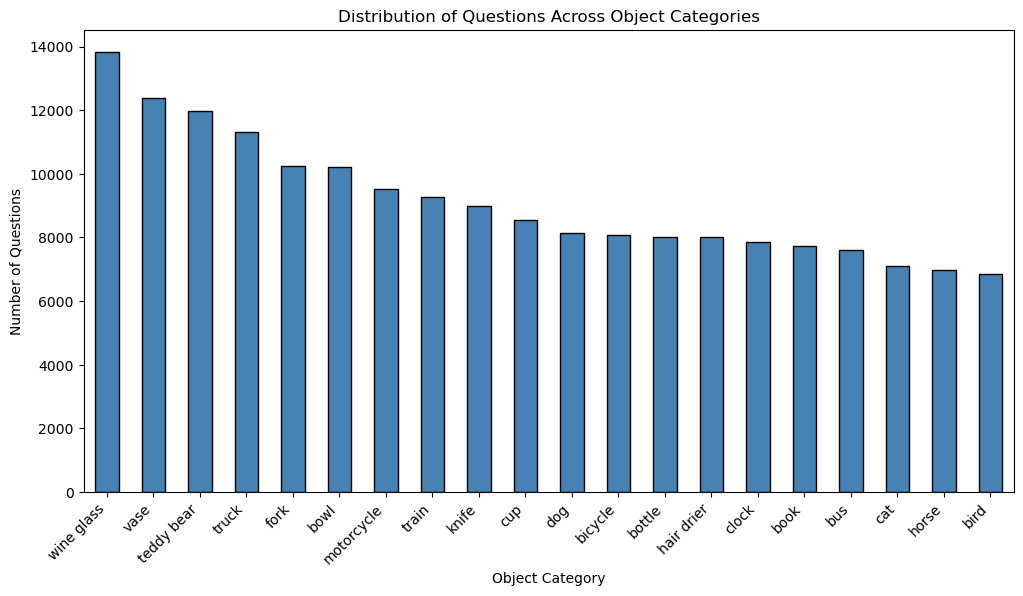

In [22]:
# Extract object categories
data['category'] = data['image_path'].apply(lambda x: x.split('/')[0])  # Extract first part before '/'

# Count the number of questions per category
category_distribution = data['category'].value_counts()

# Convert to DataFrame for analysis
category_data = pd.DataFrame({'Category': category_distribution.index, 'Number of Questions': category_distribution.values})

# Display basic stats
print(category_data.head(10))  # Show top 10 categories

# Visualizing category distribution
plt.figure(figsize=(12, 6))
category_distribution.head(20).plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel("Object Category")
plt.ylabel("Number of Questions")
plt.title("Distribution of Questions Across Object Categories")
plt.xticks(rotation=45, ha='right')
plt.show()

Answer Type Distribution:
answer_type
Yes/No         124543
Number          56628
Single Word     53712
Descriptive       538
Name: count, dtype: int64


C:\Users\tcgnh\AppData\Local\Temp\ipykernel_20860\690675428.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=answer_type_distribution.index, y=answer_type_distribution.values, palette="viridis")


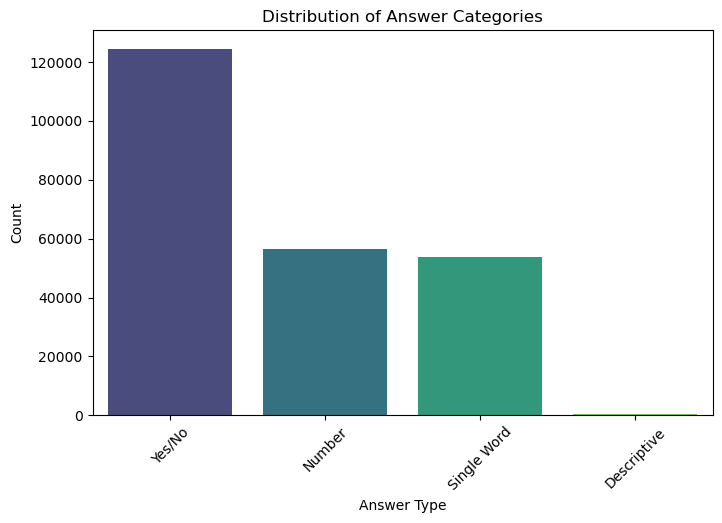

In [30]:
import re

# Define simple classification function for answer types
def classify_answer(answer):
    if re.match(r'^[0-9]+$', str(answer)):
        return "Number"
    elif str(answer).lower() in ["yes", "no"]:
        return "Yes/No"
    elif re.match(r'^[a-zA-Z]+$', str(answer)) and len(str(answer).split()) == 1:
        return "Single Word"
    else:
        return "Descriptive"

# Apply classification
data['answer_type'] = data['answer'].apply(classify_answer)

# Count occurrences of each answer type
answer_type_distribution = data['answer_type'].value_counts()

# Display basic statistics
print("Answer Type Distribution:")
print(answer_type_distribution)

# Visualizing the answer type distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=answer_type_distribution.index, y=answer_type_distribution.values, palette="viridis")
plt.xlabel("Answer Type")
plt.ylabel("Count")
plt.title("Distribution of Answer Categories")
plt.xticks(rotation=45)
plt.show()

Total Words: 1499933
Unique Words: 5103
Vocabulary Diversity (Unique/Total): 0.0034


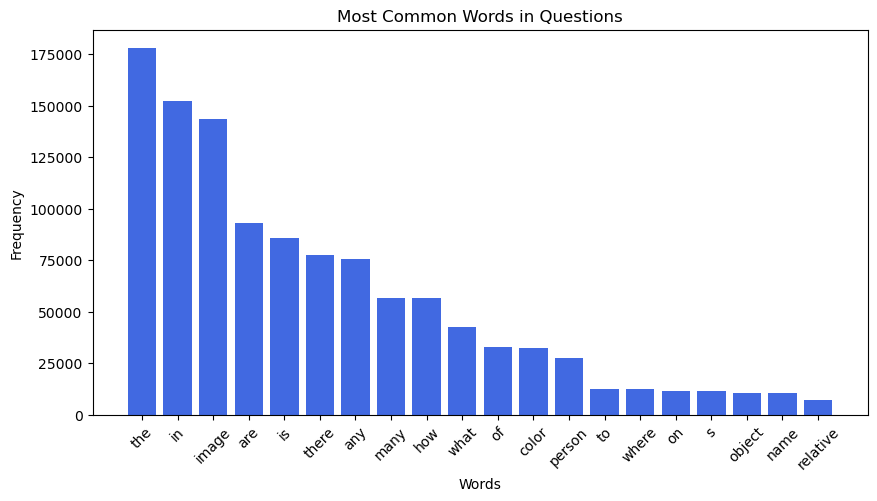

In [34]:
from collections import Counter

# Tokenize and count unique words in questions
all_questions = " ".join(data['question'].dropna().astype(str))
words = re.findall(r'\b\w+\b', all_questions.lower())
word_counts = Counter(words)

# Compute vocabulary diversity
unique_words = len(word_counts)
total_words = sum(word_counts.values())
vocab_diversity = unique_words / total_words

# Display basic statistics
print(f"Total Words: {total_words}")
print(f"Unique Words: {unique_words}")
print(f"Vocabulary Diversity (Unique/Total): {vocab_diversity:.4f}")

# Get the top 20 most common words
common_words = word_counts.most_common(20)
word_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Visualizing most common words
plt.figure(figsize=(10, 5))
plt.bar(word_df['Word'], word_df['Frequency'], color='royalblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Questions")
plt.xticks(rotation=45)
plt.show()
